## HR Attrition Analysis

In the business world, companies often face the challenge of retaining talented employees. One of the most pressing issues is the increasing rate of employee turnover, commonly known as HR attrition. Turnover can have a significant impact on a company’s productivity, stability, and long-term sustainability. High attrition rates can lead to increased recruitment and training costs, disrupt team dynamics, and 
result in the loss of valuable institutional knowledge. Therefore, understanding th 
factors contributing to attrition and implementing effective retention strategies is
crucial for maintaining a competitive edge and ensur.

## Objectives of the Analysis
1.. Understand Current Turnover Rates: Gain a comprehensive understanding  f
the current employee turnover rate and analyze the demographic distribution of
attrition by age, gender, education, department, and job role
2. Identify Key Factors Influencing Turnover: Examine the main fa tors
contributing to employee attrition, including job satisfaction indicators (job
involvement and work-life balance), salary factors (monthly income and salary
hikes), and benefit factors (stock option levels), to uncover patterns and
correlations that drive higher attriti
on rates.ing


## Import necessary libraries


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [25]:
# Load dataset

df = pd.read_csv(r'C:\Users\visma\Downloads\WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
# Shape, missing, duplicates

print("Shape:", df.shape)
print("\nMissing:\n", df.isnull().sum().sum())
print("\nDuplicates:", df.duplicated().sum())


Shape: (1470, 35)

Missing:
 0

Duplicates: 0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

## Exploratory Data Analysis

In [27]:
## basic descriptive statistics
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [28]:
#Mapping the attrition 1 - yes and 0 - no in the new colum
df["left"] = np.where(df["Attrition"] == "Yes",1,0)

In [29]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,left
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,0


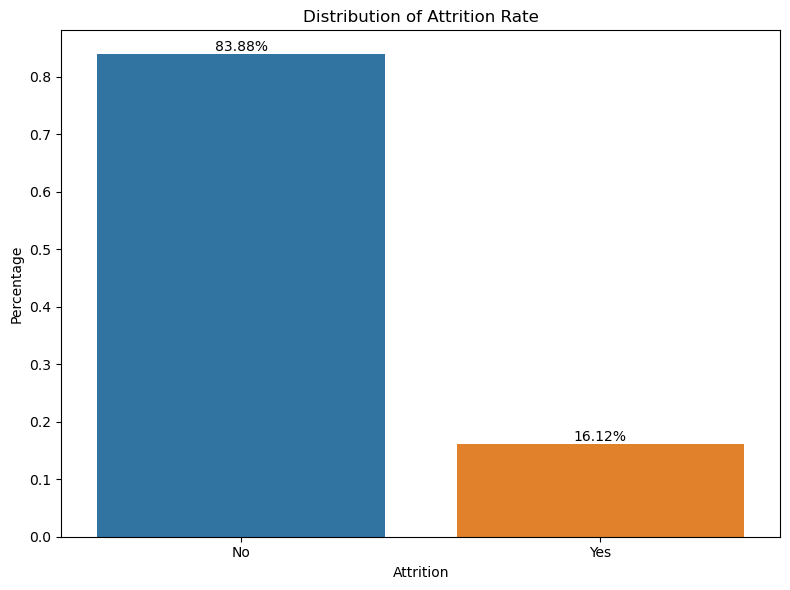

In [12]:
# Attrition distribution

attrition = df['Attrition'].value_counts(normalize=True)

plt.figure(figsize=(8,6))
ax = sns.barplot(x=attrition.index, y=attrition)

for p in ax.patches:
    ax.annotate(f'{p.get_height() * 100:.2f}%',(p.get_x() + p.get_width() / 2.,p.get_height()),ha='center', va='bottom')

plt.title('Distribution of Attrition Rate')
plt.xlabel('Attrition')
plt.ylabel('Percentage')
plt.tight_layout()
plt.show()

Based on the analysis, the company's attrition rate is 16.12%. This means that about
16.12% of the employees decided to leave the company during the analyzed period.
    
Average of Tenure

Average tenure: The average tenure measures the average number of years an
employee stays with the company before leaving. It can provide insight into workforce
stability and employee satisfaction within the organization.

In [14]:
avg_tenure = df['YearsAtCompany'].mean()

print(f'Average years of employee to leave the company is {avg_tenure} years') 

Average years of employee to leave the company is 7.0081632653061225 years


The average tenure of employees before they decided to leave was 7.01 years. With this average tenure, it can be concluded that many employees feel comfortable and have been with the company for a long time.

## Analyizing the variables

 Numerical Variables

## Age


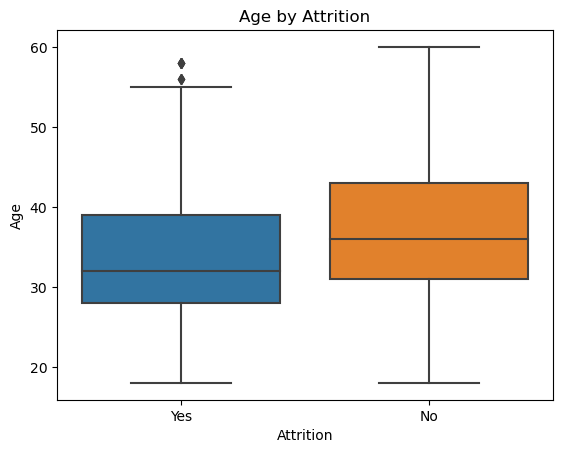

In [31]:
sns.boxplot(x='Attrition', y='Age', data=df)
plt.title("Age by Attrition")
plt.show()

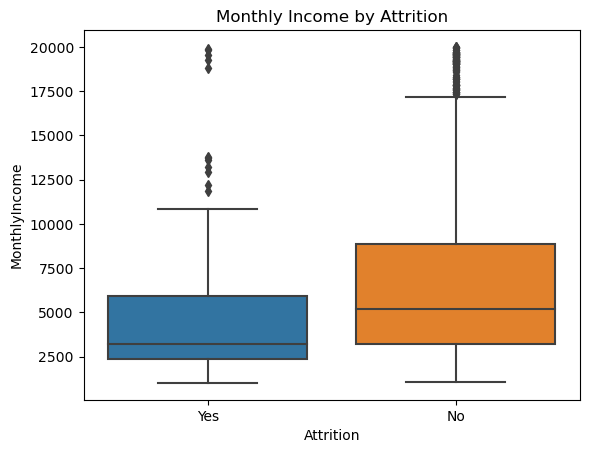

In [7]:
# Monthly income by attrition

sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title("Monthly Income by Attrition")
plt.show()

## PercentSalaryHike

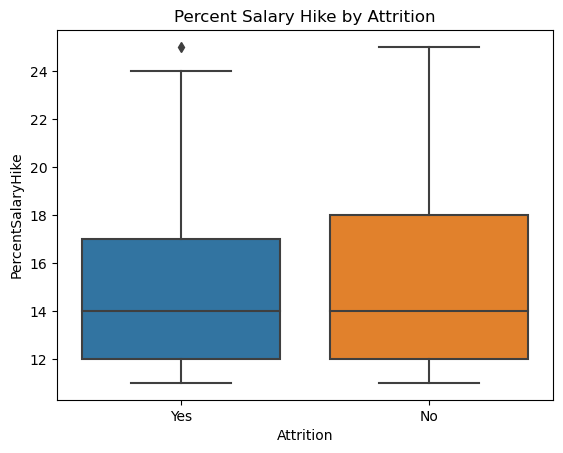

In [34]:
##PercentSalary Hike

sns.boxplot(x='Attrition', y='PercentSalaryHike', data=df)
plt.title("Percent Salary Hike by Attrition")
plt.show()

## Total Working years

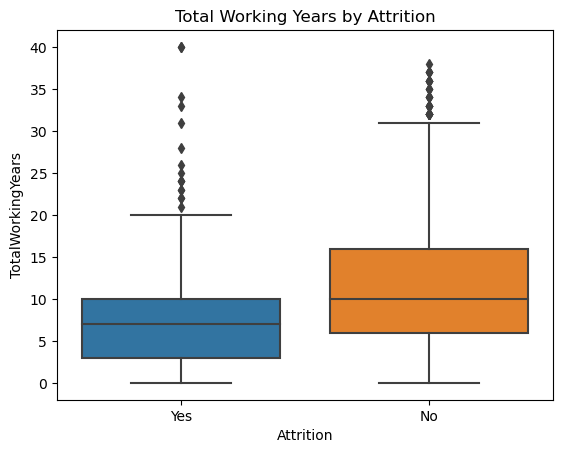

In [36]:
##Total Working Years

sns.boxplot(x='Attrition', y='TotalWorkingYears', data=df)
plt.title("Total Working Years by Attrition")
plt.show()

Majority (60% of total strength) of employee's receive 16% salary hike in the company, employee's who received less salary hike have left the company.

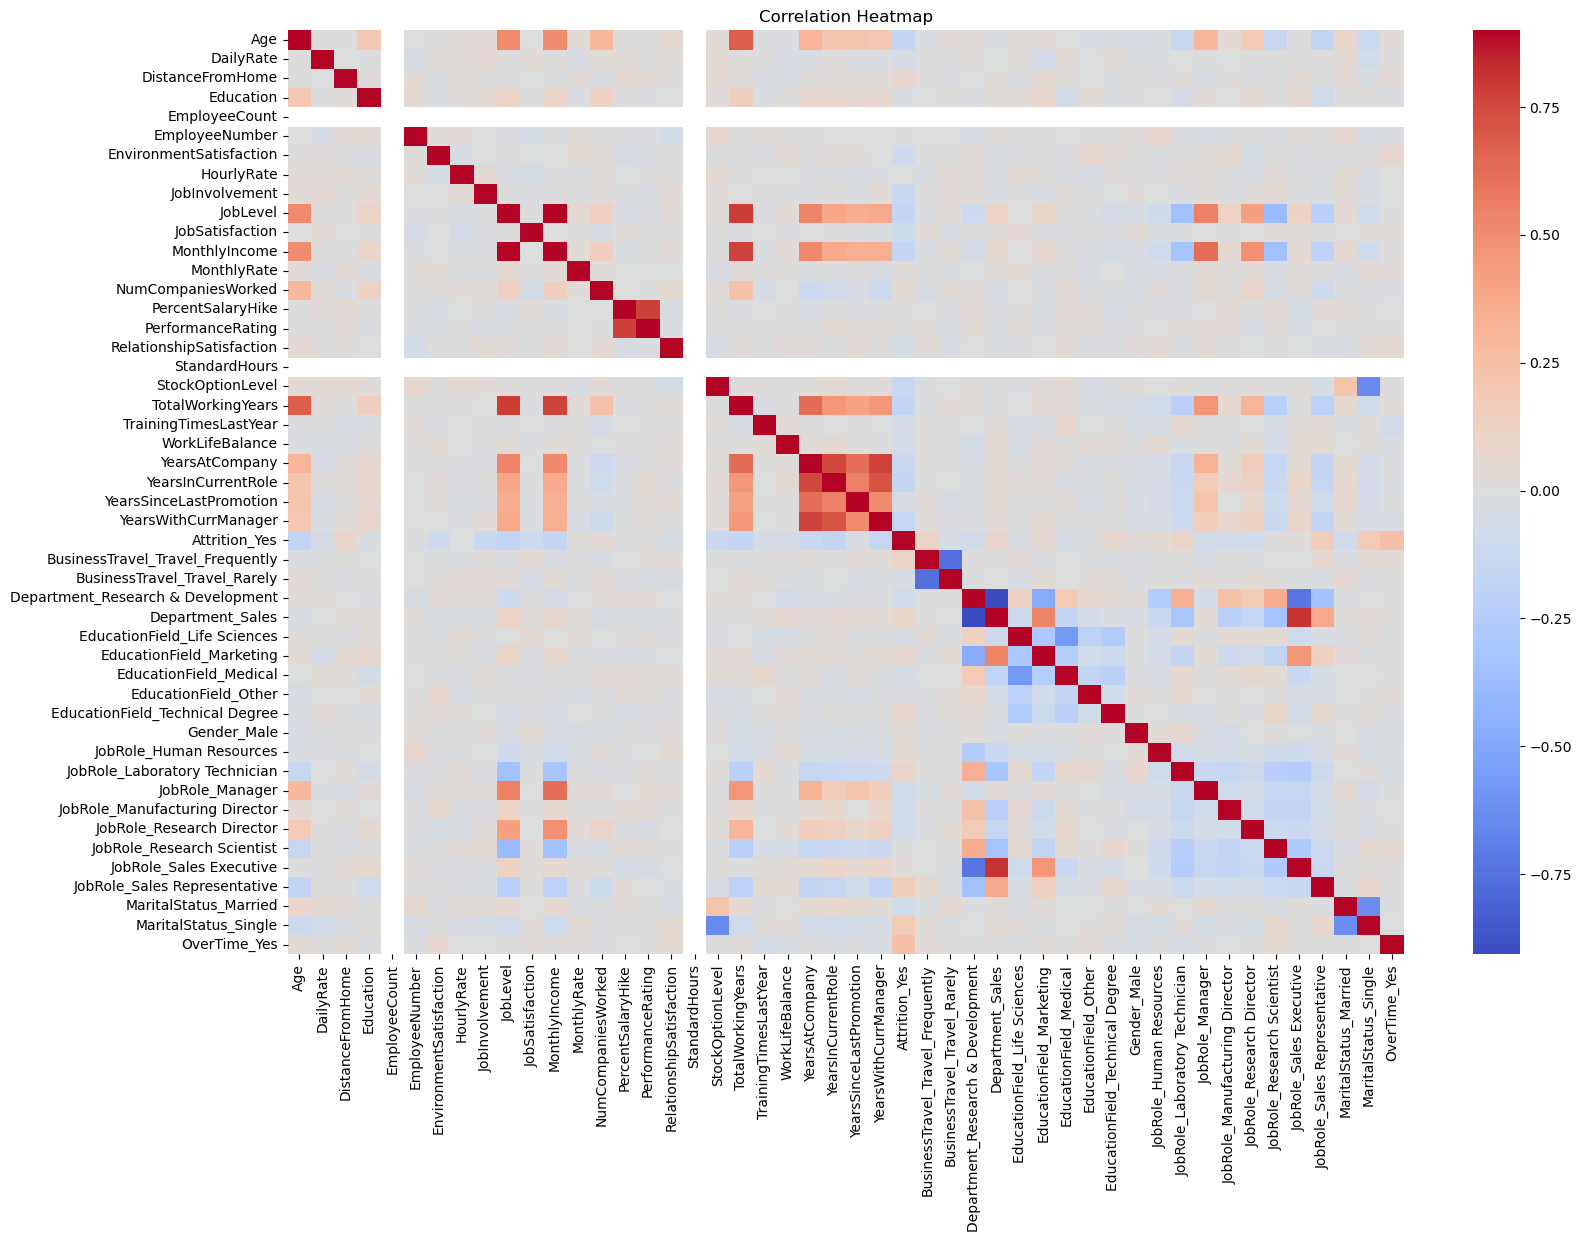

In [8]:
# Correlation matrix

df_encoded = pd.get_dummies(df, drop_first=True)
plt.figure(figsize=(18, 12))
sns.heatmap(df_encoded.corr(), cmap='coolwarm', vmax=0.9)
plt.title("Correlation Heatmap")
plt.show()

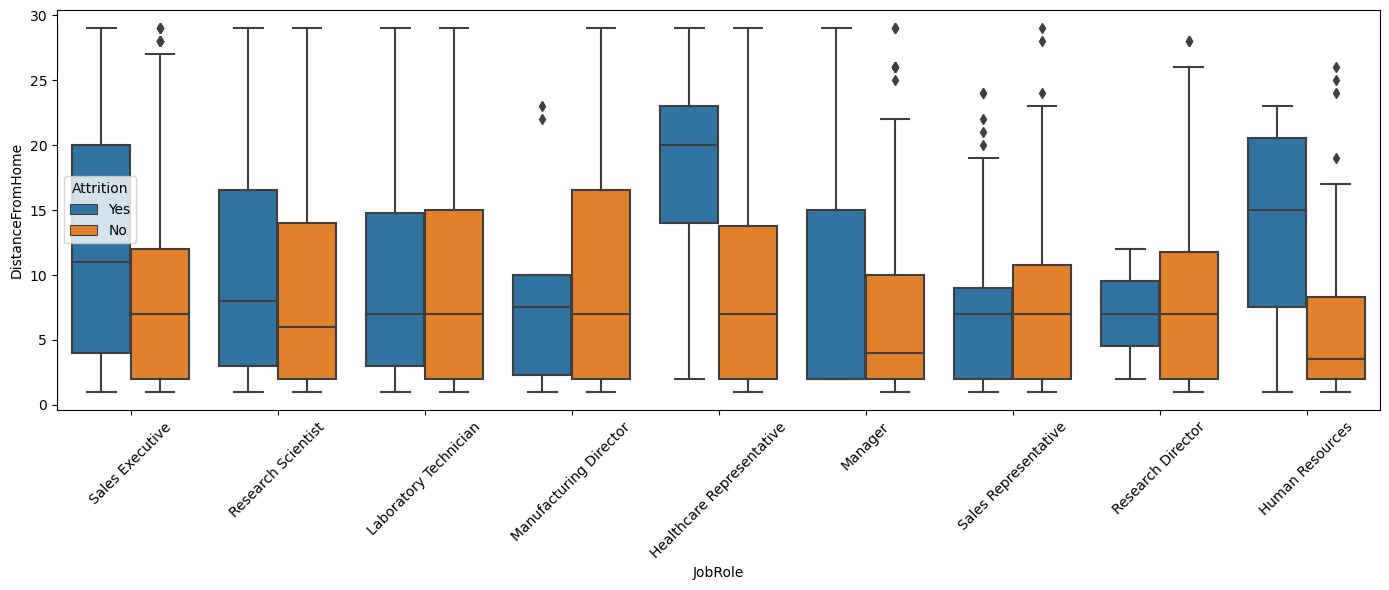

In [9]:
# Distance from home by job role

plt.figure(figsize=(14, 6))
sns.boxplot(x='JobRole', y='DistanceFromHome', hue='Attrition', data=df)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

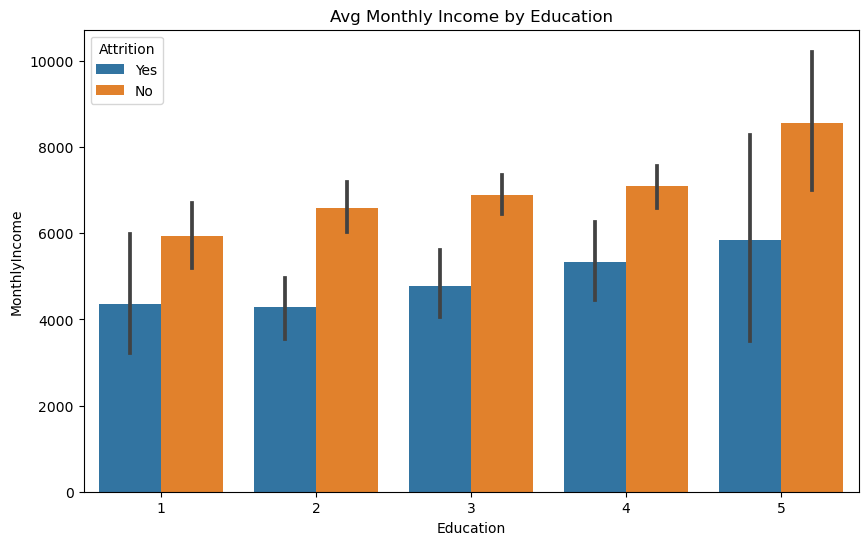

In [10]:
# Average Monthly Income by Education and Attrition

plt.figure(figsize=(10, 6))
sns.barplot(x='Education', y='MonthlyIncome', hue='Attrition', data=df, estimator=np.mean)
plt.title("Avg Monthly Income by Education")
plt.show()

## Employee's Demographics

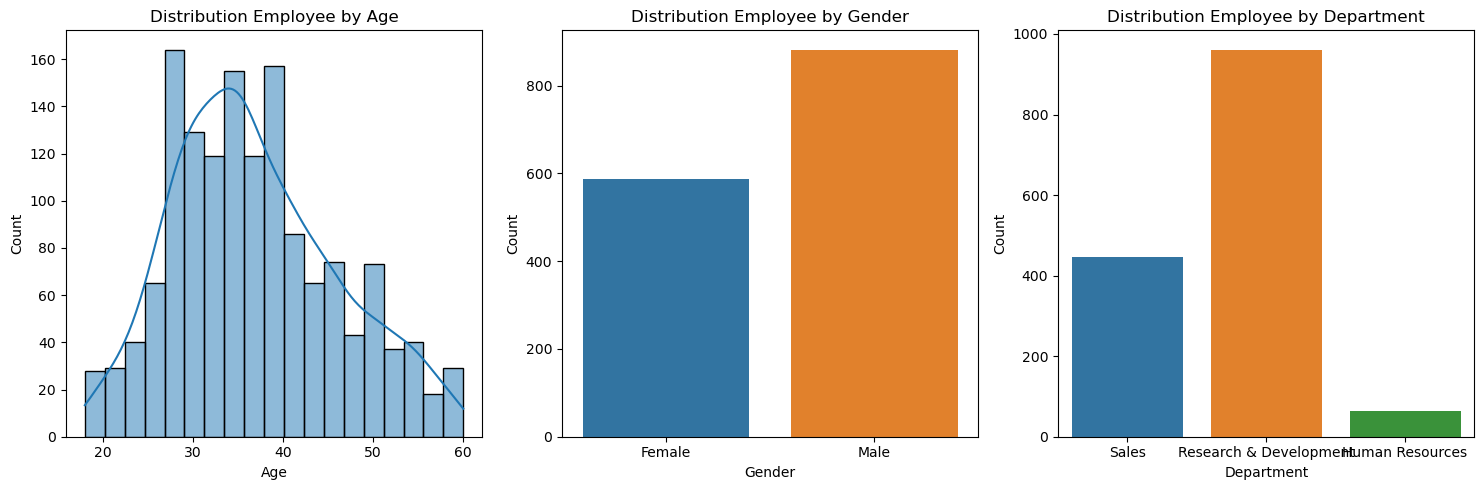

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

sns.histplot(data=df, x='Age', kde=True, ax=axes[0])
axes[0].set_title('Distribution Employee by Age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')

sns.countplot(data=df, x='Gender', ax=axes[1])
axes[1].set_title('Distribution Employee by Gender')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Count')
sns.countplot(data=df, x='Department', ax=axes[2])
axes[2].set_title('Distribution Employee by Department')
axes[2].set_xlabel('Department')
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()

1.Age: Most of the company's employees are in the 30-35 age group. This
indicates that the company has many employees who are at a productive and
experienced age.

2.Gender: The majority of employees at this company are male. There are
significantly more male employees than female employees.

3.Department: Most of the company's employees are concentrated in the
research and development department. This indicates that the company is
heavily focused on product or service research and development activities.

In [16]:
df_attrition = df[df['Attrition'] == 'Yes']
df_attrition.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
14,28,Yes,Travel_Rarely,103,Research & Development,24,3,Life Sciences,1,19,...,2,80,0,6,4,3,4,2,0,3
21,36,Yes,Travel_Rarely,1218,Sales,9,4,Life Sciences,1,27,...,2,80,0,10,4,3,5,3,0,3
24,34,Yes,Travel_Rarely,699,Research & Development,6,1,Medical,1,31,...,3,80,0,8,2,3,4,2,1,3


## Demografic Factors

In [20]:
# Fungsi untuk Menghitung Attrition Rate
def calculate_attrition_rate(df, column):
    attrition_counts = df.groupby([column,'Attrition']).size().unstack(fill_value=0)
    attrition_rate = attrition_counts['Yes'] / attrition_counts.sum(axis=1) * 100
    attrition_rate_df = attrition_rate.reset_index()
    attrition_rate_df.columns = [column, 'AttritionRate']
    return attrition_rate_df

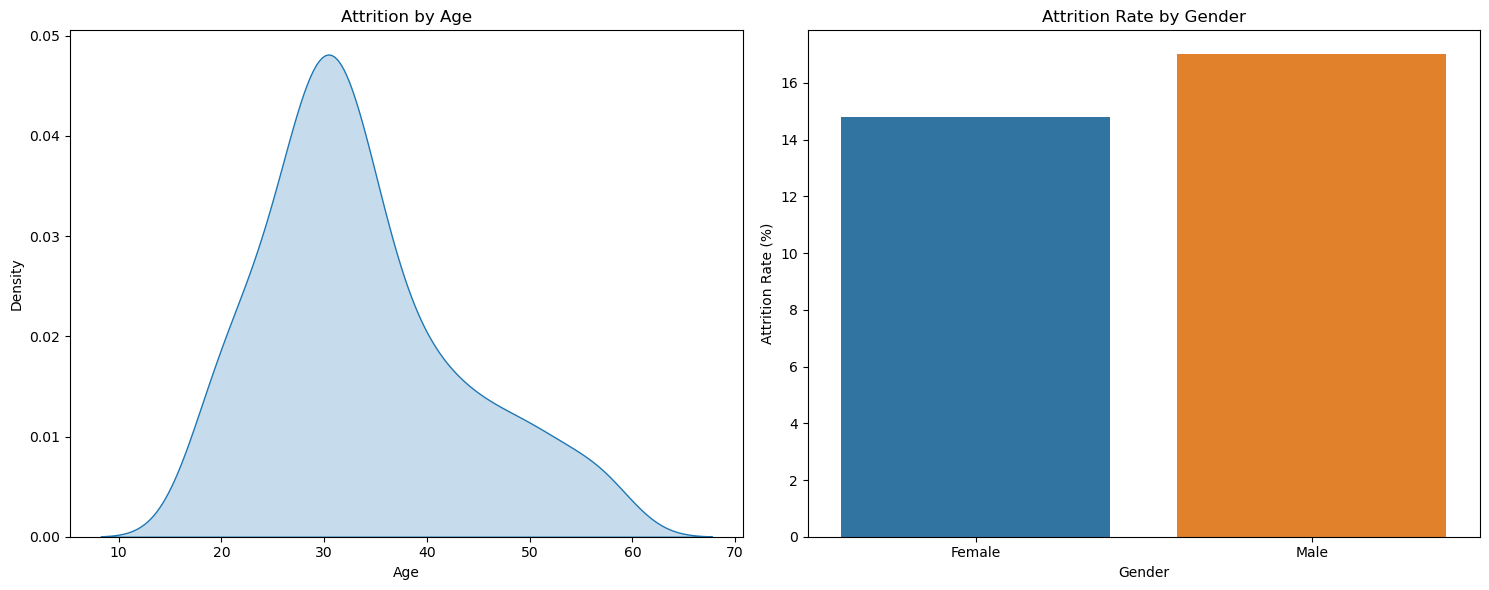

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,6))

# Plot 1: KDE plot of Age with Attrition hue
sns.kdeplot(data=df_attrition, x='Age', fill=True, ax=axes[0])
axes[0].set_title('Attrition by Age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Density')

# Plot 2: Bar plot of Gender count with Attrition hue
attrition_rate_df = calculate_attrition_rate(df, 'Gender')
sns.barplot(data=attrition_rate_df, x='Gender',
y='AttritionRate', ax=axes[1])
axes[1].set_title(f'Attrition Rate by Gender')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Attrition Rate (%)')

plt.tight_layout()
plt.show()

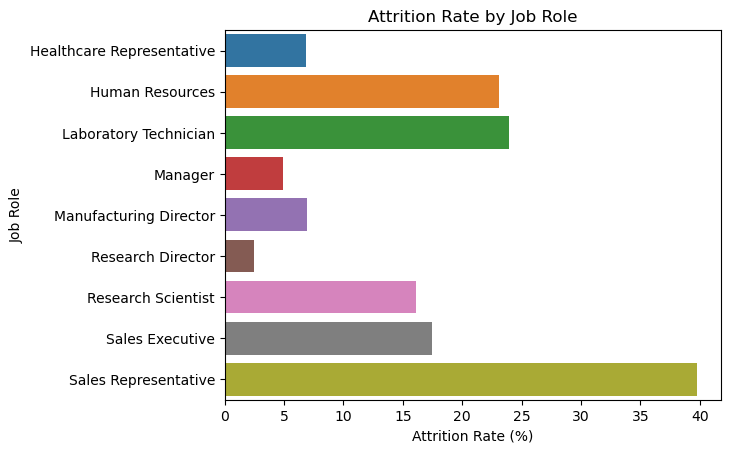

In [23]:
## Explore categorical variables
# Example: Attrition Rate by Job Role
attrition_rate_jobrole = calculate_attrition_rate(df, 'JobRole')
sns.barplot(data=attrition_rate_jobrole, x='AttritionRate', y='JobRole')
plt.title('Attrition Rate by Job Role')
plt.xlabel('Attrition Rate (%)')
plt.ylabel('Job Role')
plt.show()
